# Loan Default Prediction



## Project Canvas

### Background



A major proportion of retail bank profit comes from interests in the form of home loans. These loans are borrowed by regular income/high-earning customers. Banks are most fearful of defaulters, as bad loans (NPA) usually eat up a major chunk of their profits. Therefore, it is important for banks to be judicious while approving loans for their customer base.

The approval process for the loans is multifaceted. Through this process, the bank tries to check the creditworthiness of the applicant on the basis of a manual study of various aspects of the application. The entire process is not only effort-intensive but also prone to wrong judgment/approval owing to human error and biases.

There have been attempts by many banks to automate this process by using heuristics. But with the advent of data science and machine learning, the focus has shifted to building machines that can learn this approval process and make it free of biases and more efficient. At the same time, one important thing to keep in mind is to make sure that the machine does not learn the biases that previously crept in because of the human approval process.

### Value Proposition



A bank's consumer credit department aims to simplify the decision-making process for home equity lines of credit to be accepted. To do this, they will adopt the Equal Credit Opportunity Act's guidelines to establish an empirically derived and statistically sound model for credit scoring. The model will be based on the data obtained via the existing loan underwriting process from recent applicants who have been given credit. The model will be built from predictive modeling techniques, but the model created must be interpretable enough to provide a justification for any adverse behavior (rejections).

* Free of biases and be more efficient
* Simply decision making process
* Compliance

### Objective

* Build a classification model to predict clients who are likely to default on their loan
* Give recommendations to the bank on the important features to consider while approving a loan.

### Methodology and Approach

1. Perform some ***basic data analysis and exploratory analysis***.
2. Decide the ***models that will be used***.
3. Define which ***metrics will be used*** to optimize on and judge model performance.
4. Perform ***model data pre-processing and prepration***.
     - Data Cleansing (missing, duplicates, etc..) - Imputation
     - Feature Engineering
     - Choose Sampling techniques to be used
     - Choose Scaling techniques to be used
     - Split the data data in training and test sets
5. ***Train models***.
     - For each model type:
        - Use *default parameters*, then score against the test/validation dataset.
         - Then, perform *hyper-parameter tuning* on the best performing default models to find the best parameters, retrain and rescore.
       - Select the best parameter set for each model.
6. Select the ***best model*** based on the metrics you have defined
7. Give the observations / feedback / recommendations

### Data Description



**Data Dictionary**

The Home Equity dataset (HMEQ) contains baseline and loan performance information for recent home equity loans. The ***target (BAD)*** is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. There are 12 input variables registered for each applicant.

* **BAD**: 1 = Client defaulted on loan, 0 = loan repaid
* **LOAN**: Amount of loan approved
* **MORTDUE**: Amount due on the existing mortgage
* **VALUE**: Current value of the property
* **REASON**: Reason for the loan request (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts)
* **JOB**: The type of job that loan applicant has such as manager, self, etc.
* **YOJ**: Years at present job
* **DEROG**: Number of major derogatory reports (which indicates serious delinquency or late payments).
* **DELINQ**: Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due)
* **CLAGE**: Age of the oldest credit line in months
* **NINQ**: Number of recent credit inquiries
* **CLNO**: Number of existing credit lines
* **DEBTINC**: Debt-to-income ratio (all monthly debt payments divided by gross monthly
income. This number is one of the ways lenders measure a borrower’s ability to manage the monthly payments to repay the money they plan to borrow)

## Importing necessary libraries and data

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.gridspec as gridspec
import math
from matplotlib import cm
from matplotlib.cm import get_cmap
import matplotlib.ticker as ticker
import itertools

import warnings
warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build models for prediction
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.inspection import permutation_importance

from joblib import parallel_backend
    
# To encode categorical variables
from sklearn.preprocessing import LabelEncoder

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, make_scorer, recall_score, roc_curve, auc, accuracy_score, mean_squared_error, log_loss, r2_score

# Import system 
import sys

%reload_ext autoreload
%autoreload 2

### Import helper functions to be used later

In [79]:
# Append the directory to your python path using sys
sys.path.append('../utilities')

# Import the utils.py file
import utils
import importlib
importlib.reload(utils)

<module 'utils' from '/Users/christopherpaskins/Projects/Machine Learning/machine-learning/Classification-Loan-Default/../utilities/utils.py'>

### Read in the dataset

In [80]:
# Read the dataset file
data = pd.read_csv('https://drive.google.com/uc?export=download&id=1FJ1jtPmyOBj0Tlm-z8VTGEDXYk6YOEHj')

In [81]:
# Copying data to another variable to avoid any changes to original data
same_data = data.copy()

### Data Overview



In [82]:
# View the first 5 rows of the dataset
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [83]:
# Understand the shape of the data
data.shape

(5960, 13)

In [84]:
# Checking the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [85]:
#check for duplicate values
data.duplicated().sum()

0

In [86]:
# Checking the count of unique values in each column
data.nunique()

BAD           2
LOAN        540
MORTDUE    5053
VALUE      5381
REASON        2
JOB           6
YOJ          99
DEROG        11
DELINQ       14
CLAGE      5314
NINQ         16
CLNO         62
DEBTINC    4693
dtype: int64

In [87]:
# Checking the descriptive statistics of the columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BAD,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,1.000000
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000


**Observations**

* There are 5960 rows and 13 columns
* There is missing data that will need to addressed before model build
* There are no duplicates
* There are no columns with only 1 category value


## Exploratory Data Analysis (EDA)

### **Univariate Analysis**

#### Check our target variable for balance

There are various degrees of imbalance, and what is considered imbalanced can depend on the specific problem, the total size of the dataset, and the number of classes involved. Here are some general guidelines to understand when a dataset is considered imbalanced:

**Minor Imbalance:** This is when the class distribution is slightly off from being equal but not to a degree that severely impacts model performance. An example could be a binary classification problem with a class distribution of 60% for one class and 40% for the other.

**Moderate Imbalance**: Here, the imbalance starts to become more pronounced. For instance, in a binary classification problem, a distribution of 70% for one class and 30% for the other might be considered moderately imbalanced.

**Severe Imbalance:** This is when the class distribution is highly skewed, making one class significantly underrepresented. An example would be having 90% of the data belonging to one class and only 10% to the other in a binary classification scenario.

The specific threshold at which an imbalance becomes problematic varies, but generally, datasets where one class represents less than 20% of the total can start to introduce significant challenges for many standard machine learning models. These challenges include the model's tendency to overpredict the majority class, as doing so can still achieve high accuracy despite poor minority class performance.

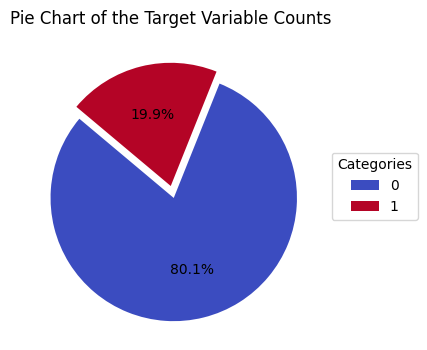

In [88]:
utils.pie_chart(data, 'BAD', figsize=[4,4])


This dataset is ***severely imbalanced***. We will need to see if there are model differences setting class weights, or use the default.

#### Category Columns

In [89]:
# Saving column names with 'object' datatype to a list - can be used later in EDA
cat_col = data.select_dtypes(include=['object']).columns.tolist()

**Counts**

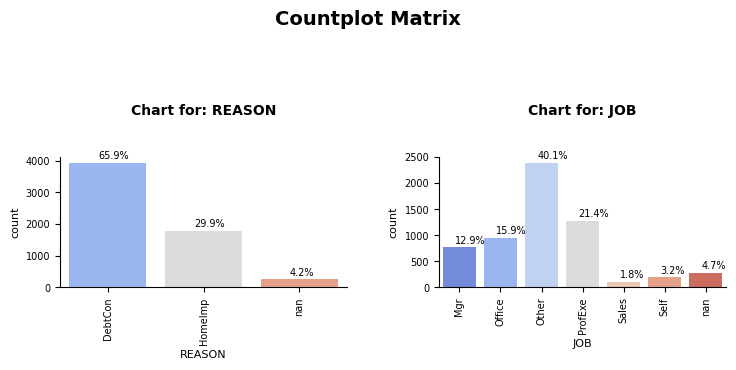

In [90]:
utils.countplot_grid(data=data, cols=cat_col)

**Observations**

* ***DebtCon*** accounts for 65.9% of the reason people apply. There is also 4.2% of data that is ***missing***.
* The job applicants held were: ***Other*** at 40.1% and ***ProfExe*** at 21.4% respectively. There is also 4.7% of the data that is ***missing***.

#### Numerical Columns

In [91]:
# Saving column names with 'int', float datatype to a list - used later in EDA
num_col = data.select_dtypes(include=['int64','float64']).columns.tolist()

# Since the target variable is really categorical we will remove it
num_col.remove('BAD')

**Distributions**

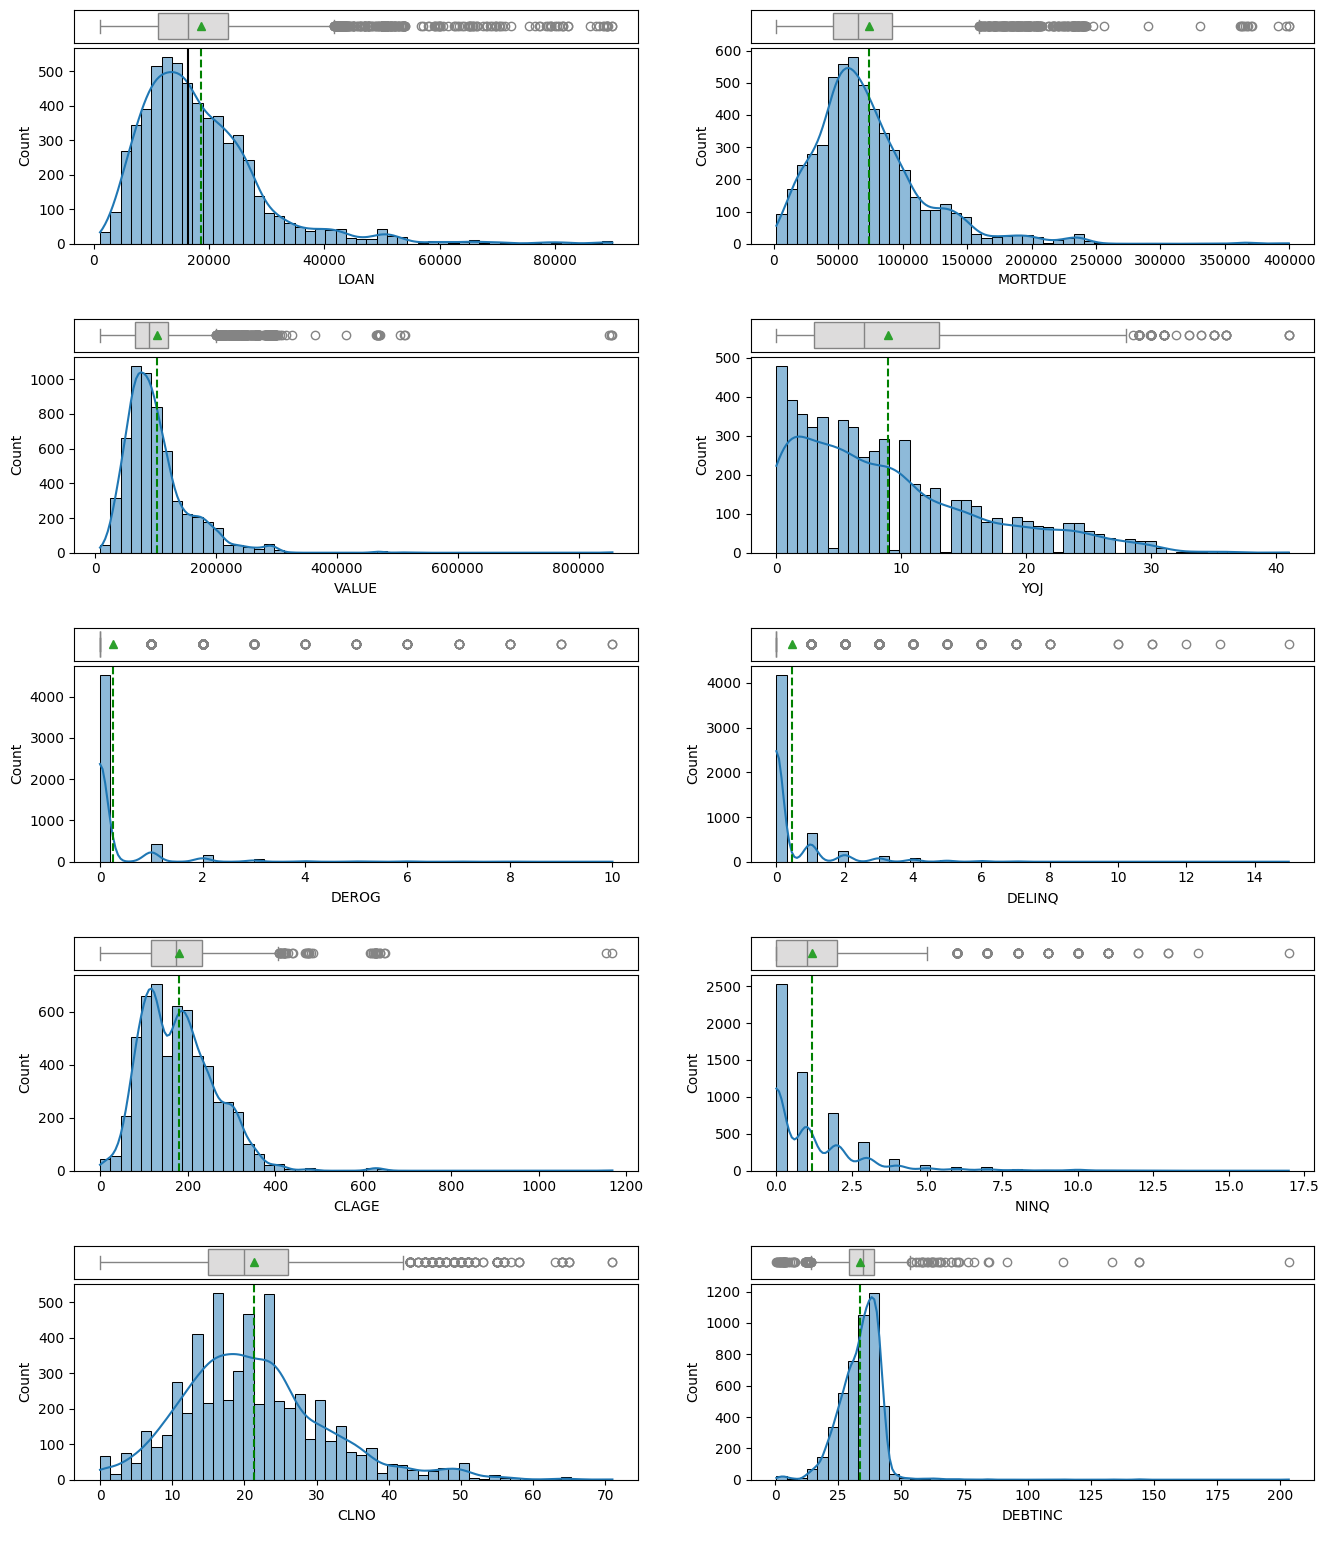

In [92]:
utils.histogram_boxplot_grid(num_col, data, 2)

**Let's check the skewness of the distributions**

In [93]:
# Create an empty DataFrame
skewness_results = {}

# Function to categorize skewness
def categorize_skewness(skew):
    if -0.5 <= skew <= 0.5:
        return 'Fairly Symmetrical'
    elif -1 <= skew < -0.5 or 0.5 < skew <= 1:
        return 'Moderately Skewed'
    else:
        return 'Highly Skewed'

# Check skewness for each column and create a new column indicating the level of skewness
for column in num_col:
    skew_value = data[column].skew()
    skewness_category = categorize_skewness(skew_value)
    skewness_results[column] = {'Skewness': skew_value, 'Level': categorize_skewness(skew_value)}
skewness_results = pd.DataFrame(skewness_results).T

skewness_results

,Skewness,Level
LOAN,2.023781,Highly Skewed
MORTDUE,1.814481,Highly Skewed
VALUE,3.053344,Highly Skewed
YOJ,0.98846,Moderately Skewed
DEROG,5.32087,Highly Skewed
DELINQ,4.02315,Highly Skewed
CLAGE,1.343412,Highly Skewed
NINQ,2.621984,Highly Skewed
CLNO,0.775052,Moderately Skewed
DEBTINC,2.852353,Highly Skewed


**Observations**

* Some distributions seem to have outliers: ***MORTDUE, VALUE, CLAGE and DEBTINC***. We will need to analyse that data to see if they are truly outliers or a part of a cluster of applicants.
* ***DEROG, DELINQ and NINQ*** seem to be discrete values.
* ***Skewness*** is observed with some variables. Due tot he discrete nature of some variables, they will not need to be transformed. ***YOJ*** however is a candidate for ***log*** transformation.

### **Bi-Variate Analysis**

#### **Distribution Statistical Testing**

1. We will look at **distributions and perform hypothesis tests** (Anova, Kruswal-Wallace, etc..), to determine if there are differences in the categories for each numerical value. We will also plot the **boxplots for where the distributions are statistically different**.

  - For the hypothesis testing we will use the following setup:
    - H<sub>o</sub> = the distributions are the same
    - H<sub>a</sub> = the distrubtions are not the same
    - $\alpha$ = .05 


  If the p-value of the test is less than $\alpha$ then we can reject the H<sub>o</sub> and declare the distrubutions are different.

2. We will also look at **count plots for the label, target variable** ***'BAD'*** as it is a boolen value and distrubtions do not always show something.

In [94]:
newdf = utils.distribution_check(data, num_col, cat_col)

# create a dataframe for the distributions that are different
boxplotdf = newdf[newdf['is_different'] == True].reset_index(drop=True)

#print the result of the data frame
boxplotdf

,num_column,cat_column,num_categories,stat_test,stat_val,p_val,is_different
0,LOAN,REASON,2,Mann-Whitney U Test,4.657724e+06,3.016463e-90,True
1,LOAN,JOB,6,Kruskal-Wallis,1.097503e+02,4.626720e-22,True


##### **Boxplots**

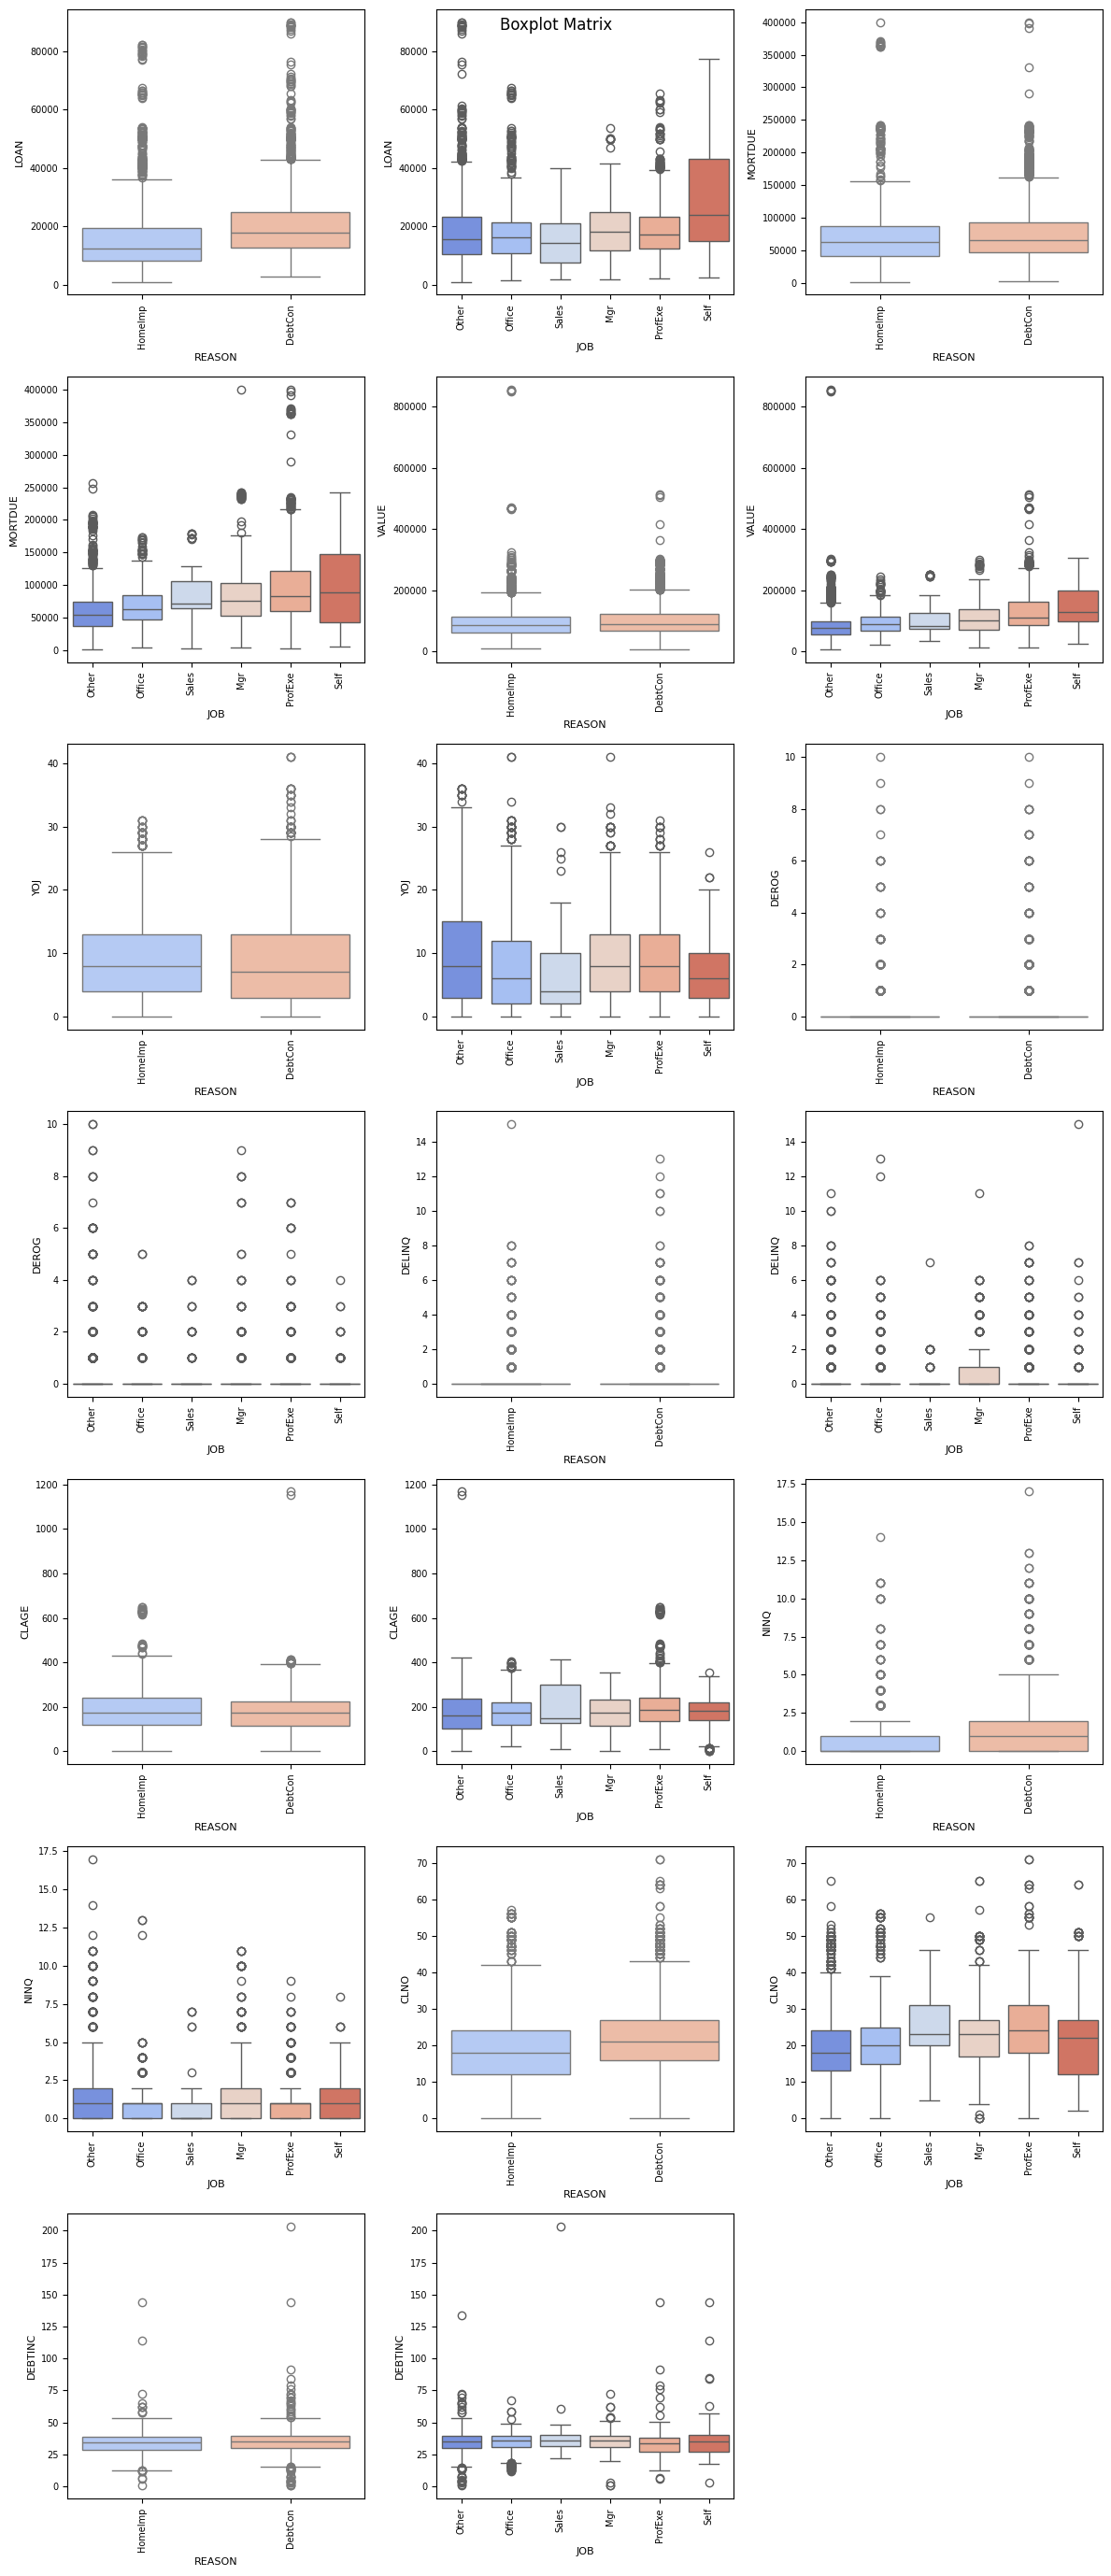

In [95]:
# columns to keep in teh dataframe to be passed to the boxplot grid
combinations = pd.DataFrame(itertools.product(num_col, cat_col), columns=['num_column','cat_column'])

#Create the boxplot grid (dataframe to indicate whoch columns to plot, the data in which to be plotted)
utils.boxplot_grid(combinations, data)

**Obervations**

* There are differences in ***LOAN*** based on the ***REASON***.
* ***Self and Other*** employed individulas request higher loan amounts in general.
* ***Self and ProfExec*** employed individulas have higher ***MORTDUE and VALUE*** in general.
* There are some distributional differences for ***YOJ*** and the ***JOB***.
* As expected, the ***CLNO*** is higher with applicants for ***REASON - DEBTCON***. It makes sense that they need to concilidate their credit lines to reduce their debt.

#### **Correlation Study**

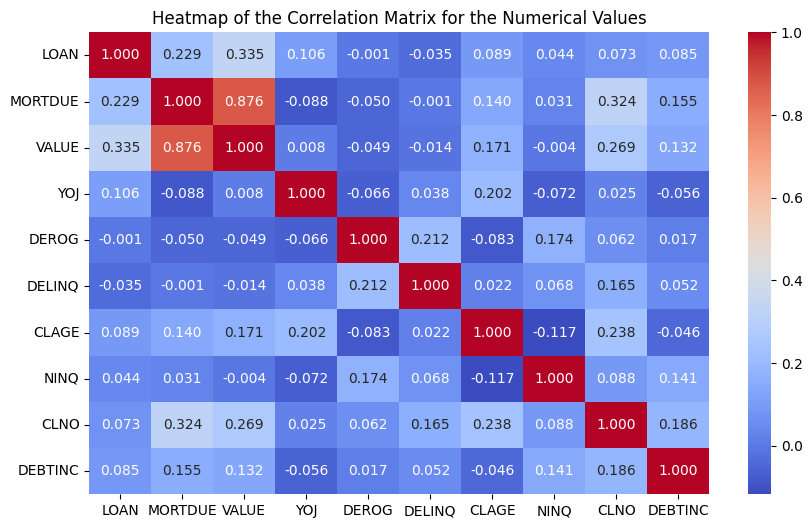

In [96]:
#create a correlation matrix and plot it
cmat = utils.corr_matrix(data[num_col])

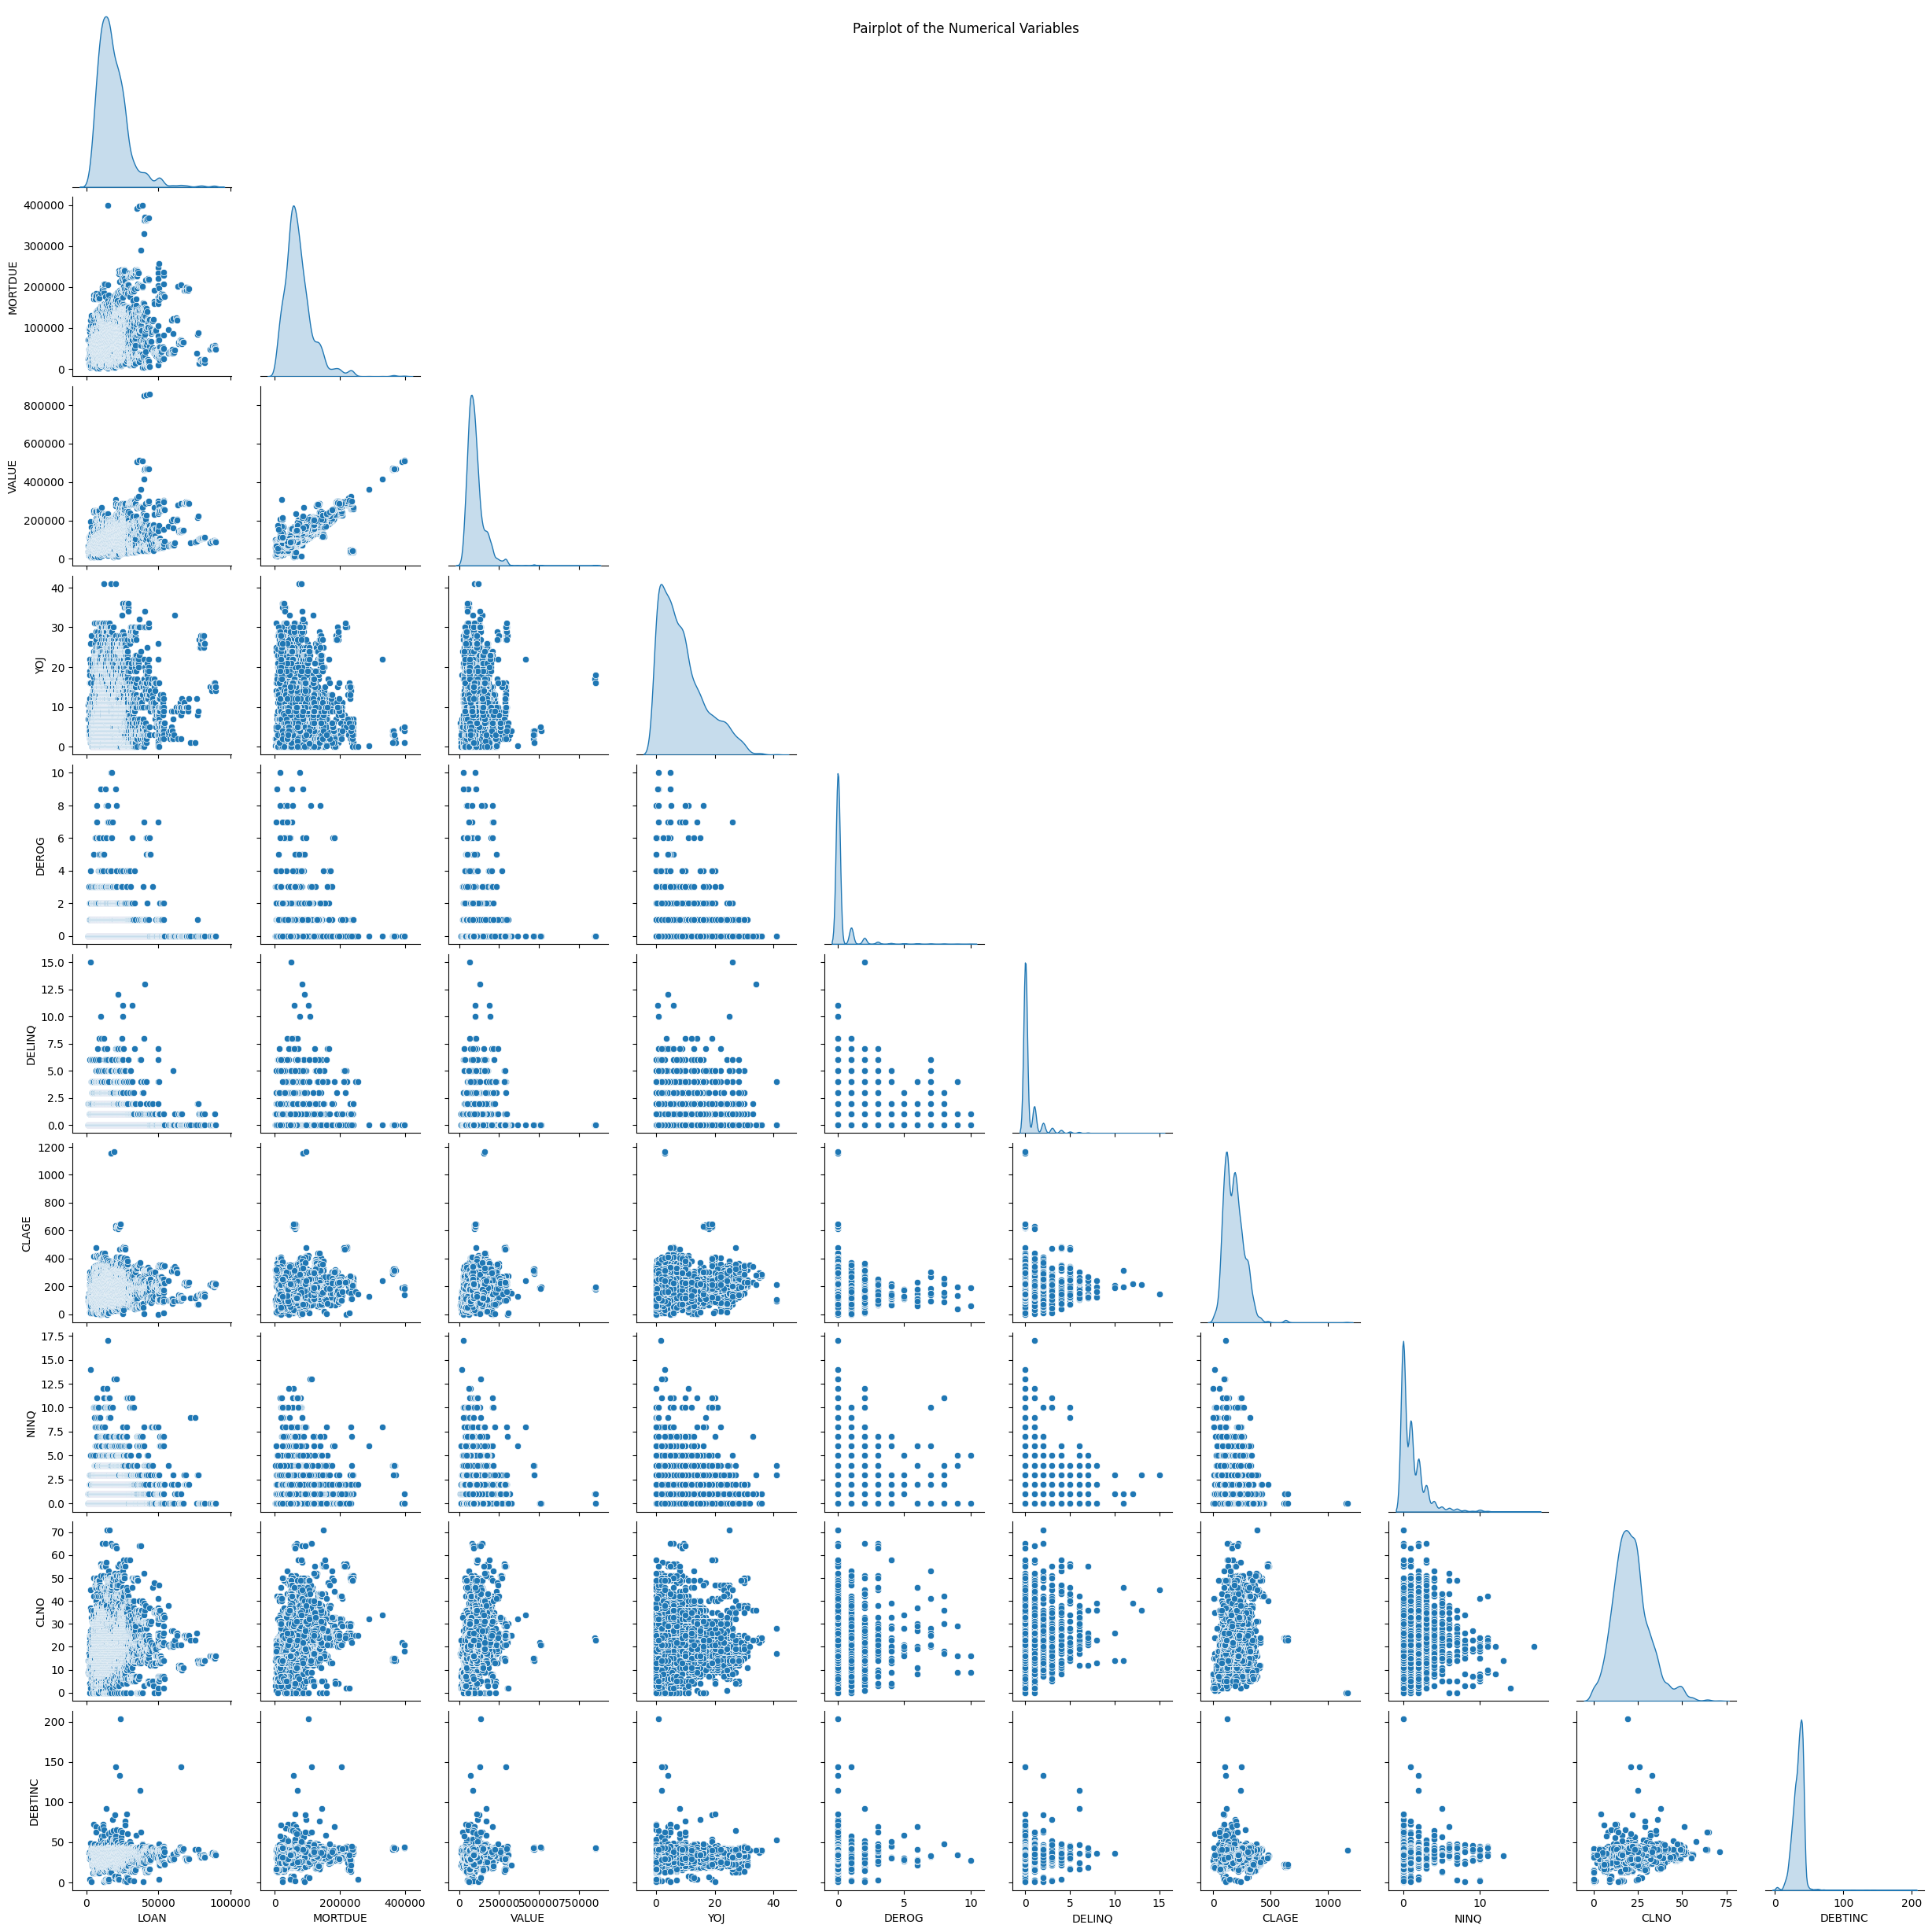

In [97]:
# use a pair plot to look at the distrubution and the correlation between the numeric variables
utils.pplot(data, num_col)

In [98]:
# Convert to long format
corr_long = cmat.stack().reset_index()
corr_long.columns = ['Variable1', 'Variable2', 'Correlation']

# Filter based on a threshold (for example, |Correlation| > 0.5)
threshold = 0.3
filtered_corr = corr_long[(corr_long['Correlation'].abs() > threshold) & (corr_long['Variable1'] != corr_long['Variable2'])]

# Removing duplicate pairs
filtered_corr = filtered_corr.loc[pd.DataFrame(np.sort(filtered_corr[['Variable1', 'Variable2']], axis=1), index=filtered_corr.index).drop_duplicates(keep='first').index]

print(filtered_corr)

   Variable1 Variable2  Correlation
2       LOAN     VALUE     0.335393
12   MORTDUE     VALUE     0.875666
18   MORTDUE      CLNO     0.323631


**Observations**
  
* The highest correlation is between ***LOAN and VALUE*** at 87%.

#### **Count Plots for the Target Variable**

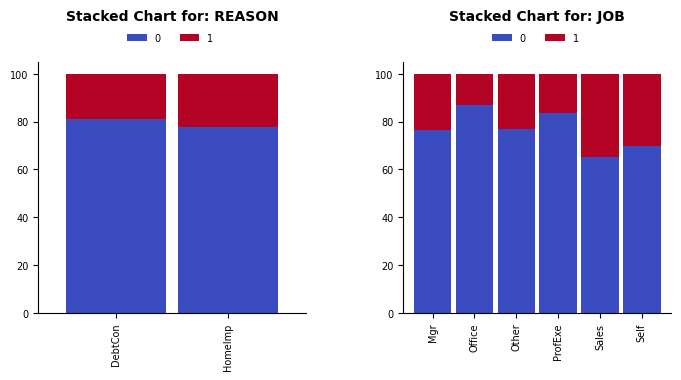

In [99]:
utils.stacked_barplot_grid(data, cat_col, 'BAD', max_columns=3)

**Observations**

* The highest default rate is applicants from the ***Sales*** and ***Self*** jobs.
* The lowest is from ***Office*** and ***ProfExe*** respectively.

#### **Plots for Columns with Discrete Values**

**Look at the default rate compared to the numeric columns have discrete values**

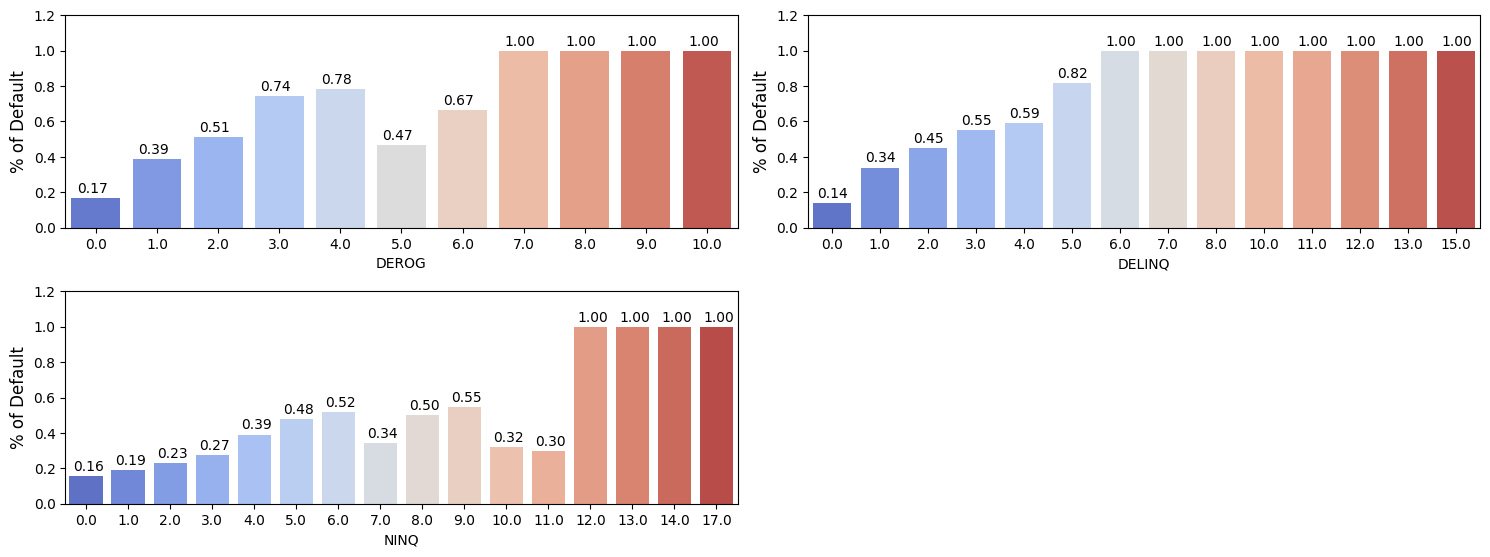

In [100]:
pay_x_fts = ['DEROG','DELINQ','NINQ']
plt.figure(figsize=(15,8))

for i,col in enumerate(pay_x_fts):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "BAD", data = data, palette = 'coolwarm', errorbar = None)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,1.2)
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.09, p.get_height()+0.03),fontsize=10)

plt.show()

**Observations**

* A expected, the increase in ***DEROG, DELINQ, and NINQ*** impacts the default rate.

***Lets take one more look at the Target variable and the impact of missing data***


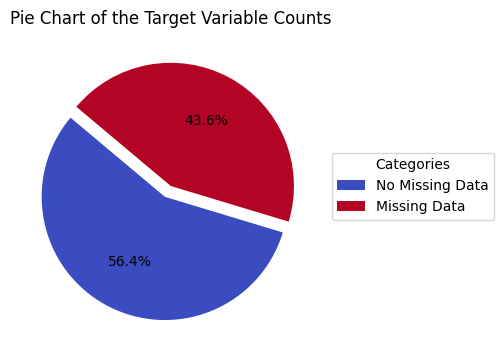

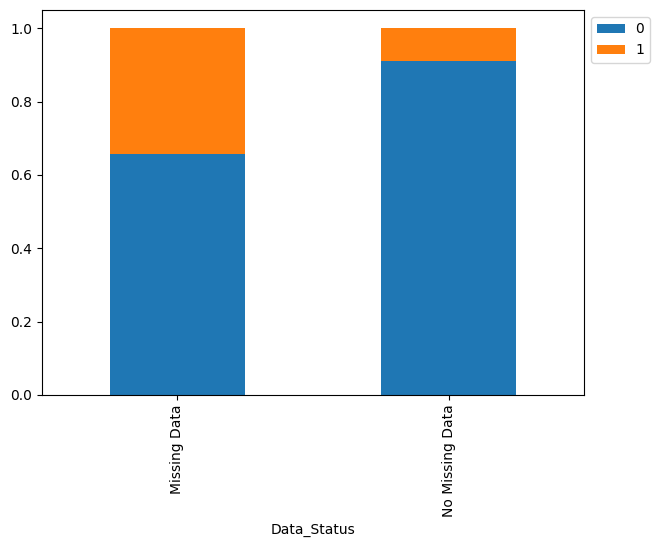

BAD,0,1,All
Data_Status,,,
Missing Data,0.286409,0.149161,0.43557
No Missing Data,0.514094,0.050336,0.56443
All,0.800503,0.199497,1.00000


In [101]:
data['mval_sum'] = data.isna().sum(axis=1)
data['Data_Status'] = data['mval_sum'].apply(lambda x: 'No Missing Data' if x == 0 else 'Missing Data')

utils.pie_chart(data, 'Data_Status', figsize=[4,4])
utils.stacked_barplot(data, 'Data_Status', 'BAD')
pd.crosstab(data['Data_Status'], data['BAD'], margins=True, normalize=True)

In [102]:
data.drop(columns=['mval_sum','Data_Status'])

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


**Observations**
* ***43.6%*** of the rows have some sort of missing values
* As we have already established, ***20%*** of the data has defaulted loans. ***15% of that 20% has missing values***. This is a huge risk in predictive power.

#### Overall Observations and Next steps

* The ***target variable is severely imbalanced***. We will need to see if there are model differences setting class weights, or use the default.
* There is missing data that will need to addressed before model build
* Columns with outliers: ***MORTDUE, VALUE, CLAGE and DEBTINC***. We need to see if there are impacts on model performance.
* ***Skewness*** is observed with some variables. YOJ will need transformation.
* There are differences in ***LOAN*** based on the ***REASON***.
* ***Self and Other*** employed individuals request higher loan amounts in general.
* ***Self and ProfExec*** employed individuals have higher ***MORTDUE and VALUE*** in general.
* There are some distributional differences for ***YOJ*** and the ***JOB***.
* As expected, the ***CLNO*** is higher with applicants for ***REASON - DEBTCON***. It makes sense that they need to concilidate their credit lines to reduce their debt.
* The highest correlation is between ***LOAN and VALUE*** at 87%. We will need to test if these are ***auto-correlated***.
* ***20%*** of the data has defaulted loans. ***15% of that 20% has missing values***. This is a huge risk in predictive power.

## Model Selection

For a supervised classification use case, there are numerous algorithms you can use, each with its own strengths and suitability for different kinds of data and problem complexities. Here's a list of commonly used classification algorithms along with a brief description of each:

1. **Logistic Regression**
  - Type: Linear model
  - Use Case: Binary or multinomial classification
  - Pros: Simple, interpretable, fast
  - Cons: Assumes linear decision boundaries, not suitable for complex relationships
2. **Decision Trees**
  - Type: Tree-based model
  - Use Case: Binary or multiclass classification
  - Pros: Easy to interpret, can handle non-linear data
  - Cons: Prone to overfitting
3. **Random Forest**
  - Type: Ensemble of Decision Trees
  - Use Case: Binary or multiclass classification
  - Pros: Handles overfitting better than individual decision trees, good performance
  - Cons: Less interpretable due to ensemble nature
4. **Gradient Boosting Machines (GBM)**
  - Type: Ensemble of weak prediction models (often decision trees)
  - Use Case: Binary or multiclass classification
  - Pros: Often provides high accuracy, can handle various types of data
  - Cons: Can be slow to train, prone to overfitting if not tuned properly
5. **Support Vector Machines (SVM)**
  - Type: Based on the concept of decision planes
  - Use Case: Binary classification, but can be extended to multiclass
  - Pros: Effective in high-dimensional spaces
  - Cons: Memory-intensive, not suitable for large datasets
6. **K-Nearest Neighbors (KNN)**
  - Type: Instance-based learning
  - Use Case: Binary or multiclass classification
  - Pros: Simple, effective, non-parametric
  - Cons: Slow with large datasets, sensitive to irrelevant features
7. **Naive Bayes (NB)**
  - Type: Probabilistic model based on applying Bayes' theorem
  - Use Case: Text classification (e.g., spam detection), binary or multiclass classification
  - Pros: Fast, suitable for high-dimensional data
  - Cons: Assumes independence between predictors
8. **AdaBoost**
  - Type: Ensemble method that combines multiple weak classifiers to create a strong classifier
  - Use Case: Binary or multiclass classification
  - Pros: Simple to implement, often provides good results
  - Cons: Sensitive to noisy data and outliers
9. **Linear Discriminant Analysis (LDA)**
  - Type: Supervised method for dimensionality reduction and classification.
  - Use Case: Suitable for binary or multiclass classification where predictors are normally distributed with equal covariance across classes.
  - Pros: Efficient in high dimensions, less prone to overfitting, explicit model representation.
  - Cons: Assumes Gaussian distribution and equal covariance matrices, less effective with non-linear separability.
10. **Quadratic Discriminant Analysis (QDA)**
  - Type: Supervised classification technique with a quadratic decision boundary.
  - Use Case: Fits complex classification problems where classes have different covariance matrices.
  - Pros: Flexible with different covariance structures, better for complex problems.
  - Cons: More prone to overfitting, computationally intensive, assumes normal distribution within classes.

***Choosing the Right Algorithm***

The choice of algorithm depends on several factors, including:

Data size, quality, and nature: Some algorithms work better with large or high-dimensional datasets, while others are suited for smaller datasets.

Complexity of the task: For linear relationships, simpler models like logistic regression may suffice. For complex relationships, ensemble methods might be more appropriate.

Performance requirements: If interpretability is key, decision trees or logistic regression might be preferred. If the highest accuracy is the goal, more complex models like gradient boosting machines or ensemble methods could be better choices.

Computational resources: Some algorithms, especially ensemble methods, require significant computational power and training time.

**Model Selection:**

Since this particular dataset is relatively small and it needs to be somewhat exaplainable we will look at all of these model and choose the highest performing technique.

## Metric Selection

Choosing the best combination of methods for a loan default prediction model involves balancing multiple metrics: accuracy, precision, recall, F1-Score and AUC. Each metric provides a different perspective on the model's performance:

* **Accuracy** shows the overall correctness of the model but might not be informative in imbalanced datasets.
* **Precision** indicates the reliability of the model's positive predictions, which is crucial in contexts where false positives have high costs.
* **Recall** (Sensitivity) measures the model's ability to catch all positive instances, essential when the cost of missing a positive (e.g., a loan default) is significant.
* **F1-Score** is a harmonic mean of precision and recall, offering a balance between these two metrics. It's particularly useful when you need a single metric to compare models where the importance of precision and recall is roughly equivalent. 
* **AUC** evaluates how well the model distinguishes between classes, with higher values indicating better performance.

Given these considerations, we'll prioritize **Recall** and **AUC** for a loan default prediction model, given the high cost associated with missing actual defaults. However we also want to ensure a balanced model with high **Precision** as well, as there is a cost associated with potential lost revenue to turning down new business due to incorrect classifications. A model with high recall ensures that most default cases are identified, even if it means tolerating more false positives (lower precision). A high AUC indicates good model discrimination capability between default and non-default cases across different threshold settings.


## Feature Engineering / Data Preparation



1. Rows with missing values
2. Data imputation
3. Data Scaling

### Let's analyse and mitigate rows with muplitple missing values

#### Category Columns

**Calculate the percentage of missing values in each column**

In [103]:
data.isnull().sum()/len(data)*100

BAD             0.000000
LOAN            0.000000
MORTDUE         8.691275
VALUE           1.879195
REASON          4.228188
JOB             4.681208
YOJ             8.640940
DEROG          11.879195
DELINQ          9.731544
CLAGE           5.167785
NINQ            8.557047
CLNO            3.724832
DEBTINC        21.258389
mval_sum        0.000000
Data_Status     0.000000
dtype: float64

**Calculate the sum of missing values for each row and save it to a new column called 'mval_cat_sum'**

In [104]:
data['mval_cat_sum'] = data[cat_col].isna().sum(axis=1)


**Plot the count of missing values against the count of the colums that have missing data**

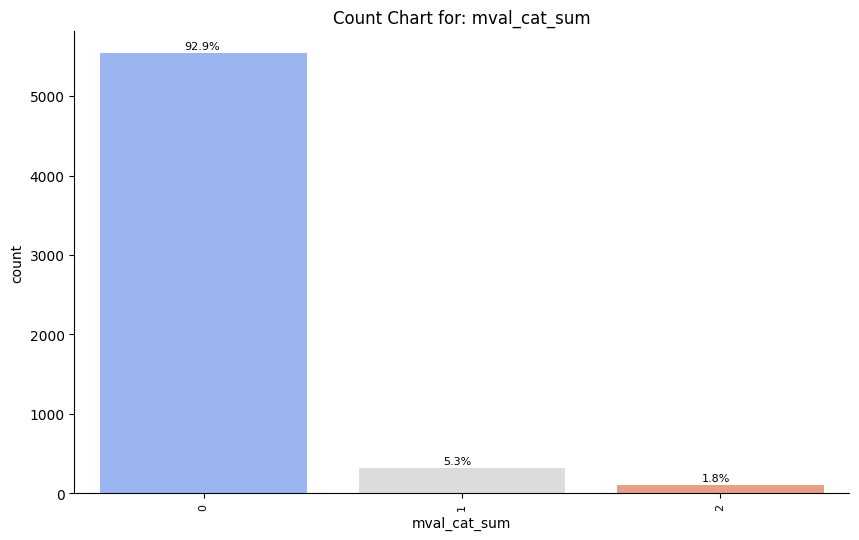

In [105]:
utils.bar_perc(data, 'mval_cat_sum', hue=False, hue_column=None, orientation='V', figsize=(10,6), showpct=True)

**Pick a threshold in order to only keep the rows that meet the criteria**

In [106]:
# Threshold for missing values in category columns
threshold = 0

# Delete rows with missing values sum exceeding the threshold and drop the temporary column
df_filtered = data[data['mval_cat_sum'] <= threshold].drop(columns=['mval_cat_sum'])
df_filtered.shape

(5536, 15)

#### Numeric Columns

**Calculate the sum of missing values for each row and save it to a new column called 'mval_num_sum'**

In [107]:
# Calculate the sum of missing values for each row
df_filtered['mval_num_sum'] = df_filtered[num_col].isna().sum(axis=1)

**Plot the count of missing values against the count of the colums that have missing data**

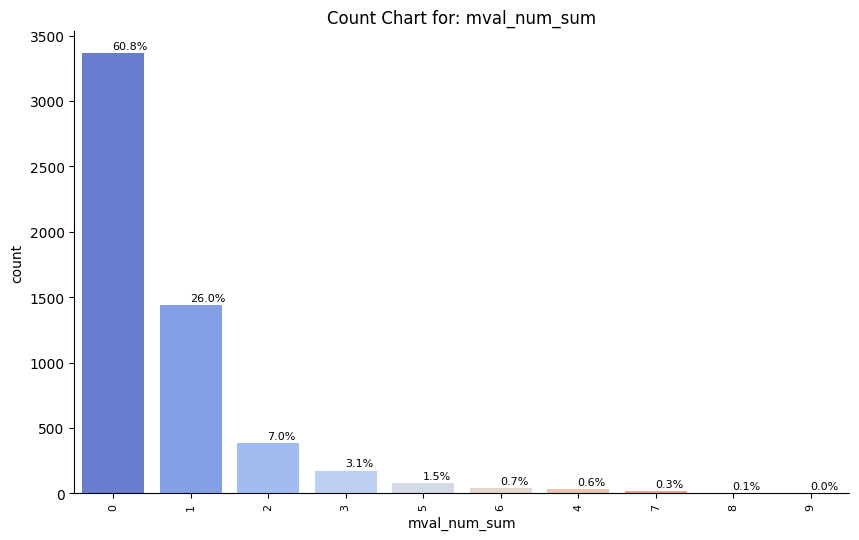

In [108]:
# plot the missing vales
utils.bar_perc(df_filtered, 'mval_num_sum', hue=False, hue_column=None, orientation='V', figsize=(10,6), showpct=True)

**Pick a threshold in order to only keep the rows that meet the criteria**

In [109]:
# Threshold for missing values in category columns
threshold = 3

# Delete rows with missing values sum exceeding the threshold
df_filtered2 = df_filtered[df_filtered['mval_num_sum'] <= threshold].drop(columns=['mval_num_sum'])
df_filtered2.shape

(5362, 15)

#### Transform the columns - YOJ

In [110]:
df_filtered2.YOJ = df_filtered2.YOJ.apply(lambda t : np.log(t+1))

In [111]:
#drop previously created columns that are no longer needed
df_filtered2.drop(columns=['mval_sum','Data_Status'], inplace=True)

**At this point we have reduced the number of rows due to heavily missing data, now we want to assess data imputation and scaling strategies, and classification techniques to see what direction we should be going**

### Data Imputation, Scaling and Model Selection

**Define several imputation, scaling, sampling and model techniques. Loop through all of the combinations and score performance**

#### ***Scaling Techniques Explained***

1. ***StandardScaler***

- **Purpose:** Aims to scale features to have a mean of 0 and a standard deviation of 1, effectively standardizing the distribution of feature values.
- **How it Works:** This scaler subtracts the mean value of each feature and then divides it by the standard deviation of each feature. 
- **Limitation:** It is sensitive to outliers since outliers can significantly affect the mean and standard deviation of the feature values.

2. ***RobustScaler***

- **Purpose:** Designed to scale features using statistics that are robust to outliers, specifically using the median and the interquartile range.
- **How it Works:** It removes the median and scales the data according to the quantile range (typically the interquartile range, IQR). The IQR is the difference between the 75th and 25th percentiles of the data.
- **Limitation:** While it is robust to outliers, its use of the median and IQR can lead to different scaling behaviors for features with different distributions and may not normalize the data's distribution.

3. ***MinMaxScaler***

- **Purpose:** Scales and translates each feature individually so that it is in the specified range on the training set, typically between zero and one.
- **How it Works:** It subtracts the minimum value of each feature and then divides by the range of that feature. The range is the difference between the original maximum and original minimum value of the feature.
- **Limitation:** It is very sensitive to outliers, as they will significantly affect the minimum and maximum values used for scaling, potentially leading to a narrow interval for the majority of the data.

Choosing the right scaler is crucial for preparing your data for machine learning algorithms, especially when they make specific assumptions about the distribution of your data or when your data includes outliers. The ***StandardScaler*** is best suited for data that is already approximately normally distributed and lacks significant outliers. The ***RobustScaler*** is preferred when your data contains outliers and you need a method that is less sensitive to them. Lastly, the ***MinMaxScaler*** is ideal when you need to normalize the range of your data to a specific scale, such as 0 to 1, though it's important to be mindful of its sensitivity to outliers.

#### ***Imputation Techniques Explained*** 

1. ***SimpleImputer***

- **Purpose:** Provides basic strategies for imputing missing values using mean, median, most frequent, or a constant.
- **How it Works:** Replaces missing values in a feature column with the chosen statistic (mean, median, mode) or a constant across the entire column.
- **Limitation:** Applies a single value to all missing entries in a feature, ignoring potential variability or relationships between features.

2. ***KNNImputer***

- **Purpose:** Imputes missing values using the k-Nearest Neighbors method, considering the similarity between samples.
- **How it Works:** For missing values, it identifies k nearest neighbors based on non-missing features and imputes values using the mean or median of these neighbors.
- **Limitation:** Computationally expensive for large datasets and sensitive to the choice of ***k*** and the distance metric, requiring careful parameter tuning.

Each imputer has its strengths, with ***SimpleImputer*** offering a straightforward approach and ***KNNImputer*** providing a more nuanced method that takes into account the relationships between data points.

#### ***Sampling Techniques Explained***

1. ***SMOTE (Synthetic Minority Over-sampling Technique)***

- **Purpose:** Increases the number of instances in the minority class by introducing synthetic examples. This approach helps balance class distribution in datasets where one or more classes are under-represented.
- **How it Works:** SMOTE selects instances that are close in the feature space, drawing a line between the examples in the feature space and generating new instances along that line.
- **Limitation:** Can generate noisy samples by interpolating new points between outlier examples and inliers. It also assumes that all points in the minority class are equally important, which might not be the case.

2. ***RandomUnderSampler***

- **Purpose:** Aims to balance class distribution by randomly selecting a subset of data for the majority class. This method reduces the number of instances in the over-represented class.
- **How it Works:** It randomly eliminates instances from the majority class to match the number of instances in the minority class, leading to a balanced dataset.
- **Limitation:** Can discard potentially useful data that could be important for building classifiers. The random elimination of instances might lead to loss of valuable information.

Both SMOTE and RandomUnderSampler address class imbalance in datasets, but they do so in fundamentally different ways: SMOTE by generating synthetic instances of the minority class, and RandomUnderSampler by eliminating instances from the majority class. The choice between them depends on the specific problem, the nature of the data, and the desired balance between precision and recall.

## Initial Model Training and Validation

***The code below will loop through all of the combinations of imputation, scaling, sampling and mdelling strategies, and store the metrics***

In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.impute import KNNImputer, SimpleImputer

#set the random state
rs = 42

# Prepare the dataset by encoding categorical variables
data_prepared = pd.get_dummies(df_filtered2, columns=['REASON', 'JOB'], drop_first=True)

# Define imputation and scaling techniques
imputation_strategies = {
    'median': SimpleImputer(strategy='median'),
    'mean': SimpleImputer(strategy='mean'),
    'knn': KNNImputer(n_neighbors=8)
}

# Define scaling techniques
scaling_techniques = {
    'standard': StandardScaler(),
    'minmax': MinMaxScaler(),
    'robust': RobustScaler()
}

# Define sampling techniques
sampling_techniques = {
    'None': 'NA',
    'Over Sampling': SMOTE(random_state=rs),
    'Under Sampling': RandomUnderSampler(random_state=rs)
}

# Define classification algorithms
classification_models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=rs),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=rs),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(random_state=rs),
    'DecisionTree': DecisionTreeClassifier(random_state=rs),
    'AdaBoost': AdaBoostClassifier(random_state=rs),
    'GradientBoosting': GradientBoostingClassifier(random_state=rs),
    'Gaussian': GaussianNB(),
    'LinearDiscriminant': LinearDiscriminantAnalysis(),
    'QuadraticDiscriminant': QuadraticDiscriminantAnalysis()
}
 
# Reinitialize storage for metrics, now including accuracy, precision, and AUC
metrics_scores_models = {}
metrics_cores = pd.DataFrame()

# Perform the comprehensive analysis for each combination

# loop through the impute strategies
for impute_strategy, imputer in imputation_strategies.items():
    numerical_data = data_prepared.select_dtypes(include=['float64', 'int64'])
    imputed_data = imputer.fit_transform(numerical_data)
    data_prepared[numerical_data.columns] = imputed_data
    
    # loop through the scaling strategies
    for scale_strategy, scaler in scaling_techniques.items():
        X = data_prepared.drop('BAD', axis=1)
        y = data_prepared['BAD']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # loop through the sampling strategies
        for sampling, sampling_type in sampling_techniques.items():
            if sampling != 'None':
                X_train_res, y_train_res = sampling_type.fit_resample(X_train_scaled, y_train)
        
            # loop through the model techniques
            for model_name, model in classification_models.items():
                if sampling != 'None':
                    model.fit(X_train_res, y_train_res)
                else:
                    model.fit(X_train_scaled, y_train)
                y_pred = model.predict(X_test_scaled)
                y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else [0] * len(y_pred)

                # Calculate metrics
                accuracy = accuracy_score(y_test, y_pred)
                precision = precision_score(y_test, y_pred)
                recall = recall_score(y_test, y_pred)
                auc = roc_auc_score(y_test, y_pred_proba)
                f1score = f1_score(y_test, y_pred)

                # Storing the metrics
                metrics_scores_models = {
                    'Model Name': model_name,
                    'Sampling': sampling,
                    'Impute Strategy': impute_strategy,
                    'Scale Strategy': scale_strategy,
                    'Accuracy': accuracy,
                    'Precision': precision,
                    'Recall': recall,
                    'F1-Score': f1score,
                    'AUC': auc
                }
                metrics_cores = pd.concat([metrics_cores, pd.DataFrame([metrics_scores_models])], ignore_index=True)


#### Let's look at the effect on the General Model performance with the F1-Score for the different factors

**Imputation Effect**

In [113]:
# Step 1: Calculate min and max F1-Score difference for each group
f1_diff = metrics_cores.groupby(['Model Name', 'Sampling', 'Scale Strategy'])['F1-Score'].agg(['min', 'max']).reset_index()
f1_diff['Difference'] = f1_diff['max'] - f1_diff['min']

# Step 2: Create pivot table with 'Impute Strategy' categories as columns
pivot_df_impute = metrics_cores.pivot_table(values='F1-Score', 
                          index=['Model Name', 'Sampling', 'Scale Strategy'], 
                          columns='Impute Strategy', 
                          aggfunc=np.mean).reset_index()

# Merge the pivot table with the F1-Score difference
pivot_df = pd.merge(pivot_df_impute, f1_diff[['Model Name', 'Sampling', 'Scale Strategy', 'Difference']], 
                    on=['Model Name', 'Sampling', 'Scale Strategy'])

print(f"The Mean difference in F1-Score for imputation is: {pivot_df['Difference'].mean()}")

The Mean difference in F1-Score for imputation is: 0.0


**Scaling Effect**

In [114]:
# look to see the different techniques effect on the f1-score metric
# Impute

# Step 1: Calculate min and max F1-Score difference for each group
f1_diff2 = metrics_cores.groupby(['Model Name', 'Sampling'])['F1-Score'].agg(['min', 'max']).reset_index()
f1_diff2['Difference'] = f1_diff2['max'] - f1_diff2['min']

# Step 2: Create pivot table with 'Impute Strategy' categories as columns
pivot_df_scale = metrics_cores.pivot_table(values='F1-Score', 
                          index=['Model Name', 'Sampling'], 
                          columns='Scale Strategy', 
                          aggfunc=np.mean).reset_index()

# Merge the pivot table with the F1-Score difference
pivot_dfs = pd.merge(pivot_df_scale, f1_diff2[['Model Name', 'Sampling', 'Difference']], 
                    on=['Model Name', 'Sampling'])

print(f"The Mean difference in F1-Score for scaling is: {pivot_dfs['Difference'].mean()}")

The Mean difference in F1-Score for scaling is: 0.03132953719454273


**Sampling Effect**

In [115]:
# look to see the different techniques effect on the f1-score metric
# Impute

# Step 1: Calculate min and max F1-Score difference for each group
f1_diff3 = metrics_cores.groupby(['Model Name', 'Scale Strategy'])['F1-Score'].agg(['min', 'max']).reset_index()
f1_diff3['Difference'] = f1_diff3['max'] - f1_diff3['min']

# Step 2: Create pivot table with 'Impute Strategy' categories as columns
pivot_df_sa = metrics_cores.pivot_table(values='F1-Score', 
                          index=['Model Name', 'Scale Strategy'], 
                          columns='Sampling', 
                          aggfunc=np.mean).reset_index()

# Merge the pivot table with the F1-Score difference
pivot_dfsa = pd.merge(pivot_df_sa, f1_diff3[['Model Name', 'Scale Strategy', 'Difference']], 
                    on=['Model Name', 'Scale Strategy'])

print(f"The Mean difference in F1-Score for sampling is: {pivot_dfsa['Difference'].mean()}")

The Mean difference in F1-Score for sampling is: 0.07917528696448557


**Observations**

* There is no effect on the F1-Score by using difference imputation methods, so we can use the best practice imputation that generalizes and is more robust towards outliers. (Using the Median)
* Sampling and Scaling does have an effect so we will look further into selecting the best methods

**Let's filter the scoring results to the top 10 combinations of models, scaling and sampling methods based on Recall. Remove the imputation**

In [116]:
metrics_final = metrics_cores.drop(columns=['Impute Strategy']).groupby(['Model Name', 'Sampling', 'Scale Strategy']).agg({
    'Accuracy': 'mean',
    'Precision': 'mean',
    'Recall': 'mean',
    'F1-Score': 'mean',
    'AUC': 'mean'
}).reset_index()


In [117]:
metrics_final.sort_values(by='Recall', ascending=False).head(15).style.background_gradient(cmap='Greens', subset=['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'], axis=0)

,Model Name,Sampling,Scale Strategy,Accuracy,Precision,Recall,F1-Score,AUC
80,RandomForest,Under Sampling,standard,0.878844,0.634868,0.910377,0.748062,0.950513
78,RandomForest,Under Sampling,minmax,0.876980,0.631579,0.905660,0.744186,0.950244
79,RandomForest,Under Sampling,robust,0.879776,0.637874,0.905660,0.748538,0.950233
33,GradientBoosting,Under Sampling,minmax,0.886300,0.659574,0.877358,0.753036,0.939298
35,GradientBoosting,Under Sampling,standard,0.886300,0.659574,0.877358,0.753036,0.939616
34,GradientBoosting,Under Sampling,robust,0.886300,0.659574,0.877358,0.753036,0.939616
6,AdaBoost,Under Sampling,minmax,0.855545,0.591640,0.867925,0.703633,0.918121
7,AdaBoost,Under Sampling,robust,0.855545,0.591640,0.867925,0.703633,0.918121
8,AdaBoost,Under Sampling,standard,0.855545,0.591640,0.867925,0.703633,0.918121
75,RandomForest,Over Sampling,minmax,0.939422,0.855072,0.834906,0.844869,0.976278


* We will look at Random Forrest, Gradient Boosting and AdaBoost models a little bit more closely

In [118]:
metrics_final.loc[metrics_final['Model Name'].isin(['RandomForest','GradientBoosting','AdaBoost'])].sort_values(by=['Model Name', 'Sampling', 'Scale Strategy']).style.background_gradient(cmap='Greens', subset=['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'], axis=0)

,Model Name,Sampling,Scale Strategy,Accuracy,Precision,Recall,F1-Score,AUC
0,AdaBoost,None,minmax,0.904007,0.822485,0.655660,0.729659,0.919589
1,AdaBoost,None,robust,0.904007,0.822485,0.655660,0.729659,0.919589
2,AdaBoost,None,standard,0.904007,0.822485,0.655660,0.729659,0.919589
3,AdaBoost,Over Sampling,minmax,0.864865,0.626415,0.783019,0.696017,0.899448
4,AdaBoost,Over Sampling,robust,0.854613,0.597222,0.811321,0.688000,0.910517
5,AdaBoost,Over Sampling,standard,0.868593,0.630037,0.811321,0.709278,0.904102
6,AdaBoost,Under Sampling,minmax,0.855545,0.591640,0.867925,0.703633,0.918121
7,AdaBoost,Under Sampling,robust,0.855545,0.591640,0.867925,0.703633,0.918121
8,AdaBoost,Under Sampling,standard,0.855545,0.591640,0.867925,0.703633,0.918121
27,GradientBoosting,None,minmax,0.915191,0.837989,0.707547,0.767263,0.947086


**General Analysis of the Results**

From the analysis results, all classifiers showed good performance across different strategies. 

* **Scaling Technique**: Random Forest's performance was robust across different scaling techniques. Since tree-based models like Random Forest do not necessarily benefit from feature scaling, the choice of scaling technique is less critical. However, if we were to generalize the solution to other models, RobustScaler might be a good choice due to its resilience to outliers, which are common in financial datasets.

* **Sampling Technique**: Since both SMOTE and RandomUnderSampler address class imbalance in datasets, but they do so in fundamentally different ways: SMOTE by generating synthetic instances of the minority class, and RandomUnderSampler by eliminating instances from the majority class. There are notable differences between the two strategies.

### Look deeper at the three models and tune them to see if we can get better performace

***Using SimpleImputer (Median), and RobustScaler - Loop through the three models and tune the hyper-parameters to increase performance*** 

In [119]:
# set the scoring method used by all algorigthms in GridSearchCV
optimize_on = recall_score

#set the random state
rs = 42

# Prepare the dataset by encoding categorical variables
data_prepared = pd.get_dummies(df_filtered2, columns=['REASON', 'JOB'], drop_first=True)

#Impute the data using recommended technique from the analysis
numerical_data = data_prepared.select_dtypes(include=['float64', 'int64'])
imputed_data = SimpleImputer(strategy='median').fit_transform(numerical_data)
data_prepared[numerical_data.columns] = imputed_data

# scale the data
scaler = RobustScaler()
X = data_prepared.drop('BAD', axis=1)
y = data_prepared['BAD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define sampling techniques
sampling_techniques = {
    'Over Sampling': SMOTE(random_state=rs),
    'Under Sampling': RandomUnderSampler(random_state=rs)
}

# Define classification algorithms
classification_models = {
    'RandomForest': { 
        'Default' : { 
            'model' : RandomForestClassifier(n_estimators=100, random_state=rs),
            'params' : None
        },
        'Tuned' : {
            'model' : RandomForestClassifier(n_estimators=100, random_state=rs),
            'params' : {'class_weight': ["balanced",{0: 0.8, 1: 0.2}],
                'criterion': ['gini', 'entropy', 'log_loss'],
                'n_estimators': [100, 150, 200],
                'max_features': ['auto', 'sqrt', .33]
            }
        }
    },
    'AdaBoost': { 
        'Default' : { 
            'model' : AdaBoostClassifier(random_state=rs, algorithm='SAMME'),
            'params' : None
        },
        'Tuned' : {
            'model' : AdaBoostClassifier(random_state=rs, algorithm='SAMME'),
            'params' : { 
                "n_estimators": [50, 250, 500, 750, 1000],
                "learning_rate" : [0.001, .01, .1, 1],
            }
        }
    },
    'GradientBoosting': { 
        'Default' : { 
            'model' : GradientBoostingClassifier(random_state=rs),
            'params' : None
        },
        'Tuned' : {
            'model' : GradientBoostingClassifier(random_state=rs),
            'params' : { 
                "n_estimators": [100, 250, 500],
                "learning_rate" : [0.01, .1],
                "min_samples_split": [10, 30, 50, 70],
                "max_leaf_nodes": [50, 75, 150, 250],
            }
        }
    }
}
    
# Reinitialize storage for metrics, now including accuracy, precision, and AUC
scores_models = {}
scores = pd.DataFrame()

# Perform the comprehensive analysis for each combination

# loop through the sampling strategies
for sampling, sampling_type in sampling_techniques.items():
    X_train_res, y_train_res = sampling_type.fit_resample(X_train_scaled, y_train)
    # loop through the models
    for model_name, mtype in classification_models.items():
        # loop through the training type
        for ttype, param in mtype.items(): 
            if ttype == 'Tuned':
                with parallel_backend(backend='multiprocessing', n_jobs=-1):
                    # Choose the type of classifier
                    estimator = param['model']
                    mparams = param['params']
                    scorer = metrics.make_scorer(optimize_on) 

                    # Run the grid search
                    grid_obj = GridSearchCV(estimator, mparams, scoring = scorer, cv = 3)
                    grid_obj = grid_obj.fit(X_train_res, y_train_res)

                # Set the classifier to the best combination of parameters
                tmodel = grid_obj.best_estimator_
                tmodel.fit(X_train_res, y_train_res)
            else:
                tmodel =  param['model']
                tmodel.fit(X_train_res, y_train_res)
            
            # predict using the model
            y_pred = tmodel.predict(X_test_scaled)
            y_pred_proba = tmodel.predict_proba(X_test_scaled)[:, 1] if hasattr(tmodel, "predict_proba") else [0] * len(y_pred)

            # Calculate metrics
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            auc = roc_auc_score(y_test, y_pred_proba)
            f1score = f1_score(y_test, y_pred)

            # Storing the metrics
            scores_models = {
                'Model Name': model_name,
                'Type': ttype,
                'Sampling': sampling,
                'Model Paramters' : tmodel,
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall,
                'F1-Score': f1score,
                'AUC': auc
            }
            scores = pd.concat([scores, pd.DataFrame([scores_models])], ignore_index=True)


**Print the dataframe with the scores from all the models**

In [120]:
#print the dataframe with the metrics from all the models with scored test data sets
scores.style.background_gradient(cmap='Greens', subset=['Precision','Recall','F1-Score','Accuracy', 'AUC'], axis=0)

,Model Name,Type,Sampling,Model Paramters,Accuracy,Precision,Recall,F1-Score,AUC
0,RandomForest,Default,Over Sampling,RandomForestClassifier(random_state=42),0.930103,0.827751,0.816038,0.821853,0.972961
1,RandomForest,Tuned,Over Sampling,"RandomForestClassifier(class_weight={0: 0.8, 1: 0.2}, n_estimators=200, random_state=42)",0.945014,0.866029,0.853774,0.859857,0.981765
2,AdaBoost,Default,Over Sampling,"AdaBoostClassifier(algorithm='SAMME', random_state=42)",0.824790,0.537975,0.801887,0.643939,0.900982
3,AdaBoost,Tuned,Over Sampling,"AdaBoostClassifier(algorithm='SAMME', learning_rate=1, n_estimators=1000, random_state=42)",0.881640,0.662835,0.816038,0.731501,0.917562
4,GradientBoosting,Default,Over Sampling,GradientBoostingClassifier(random_state=42),0.893756,0.694444,0.825472,0.754310,0.932636
5,GradientBoosting,Tuned,Over Sampling,"GradientBoostingClassifier(max_leaf_nodes=50, min_samples_split=10, n_estimators=250, random_state=42)",0.921715,0.801887,0.801887,0.801887,0.953279
6,RandomForest,Default,Under Sampling,RandomForestClassifier(random_state=42),0.879776,0.637874,0.905660,0.748538,0.950233
7,RandomForest,Tuned,Under Sampling,"RandomForestClassifier(class_weight={0: 0.8, 1: 0.2}, n_estimators=200, random_state=42)",0.868593,0.614148,0.900943,0.730402,0.954602
8,AdaBoost,Default,Under Sampling,"AdaBoostClassifier(algorithm='SAMME', random_state=42)",0.836906,0.557994,0.839623,0.670433,0.911388
9,AdaBoost,Tuned,Under Sampling,"AdaBoostClassifier(algorithm='SAMME', learning_rate=0.001, n_estimators=750, random_state=42)",0.568500,0.302362,0.905660,0.453365,0.833920


**Observations**

* Tuned Random Forrest with Oversampling give the best overall balanced model.
* All Undersampling tuned models provide for higher recall, hoever it comes with lower precision.

***We will suggest that the Tuned Random Forrest Model with Oversampling be the first choice to the business***


## Final Model Selection

***Look at some metric graphs, and feature imprtances***

Lets first re-prepare the the dataset 

In [121]:
# Prepare the dataset by encoding categorical variables
data_prepared = pd.get_dummies(df_filtered2, columns=['REASON', 'JOB'], drop_first=True)

Impute the data

In [122]:
#Impute the data using recommended technique from the analysis
numerical_data = data_prepared.select_dtypes(include=['float64', 'int64'])
imputed_data = SimpleImputer(strategy='median').fit_transform(numerical_data)
data_prepared[numerical_data.columns] = imputed_data
    

Scale the data and create training and test datasets

In [123]:
scaler = RobustScaler()
X = data_prepared.drop('BAD', axis=1)
y = data_prepared['BAD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# get a list of the column names
numeric_cols = X_test.columns

# Convert back to DataFrame with original numeric columns
X_train_scaled = pd.DataFrame(X_train_scaled, columns=numeric_cols)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numeric_cols)

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)


Train the model

In [124]:
rf = RandomForestClassifier(class_weight={0: 0.8, 1: 0.2}, n_estimators=200, random_state=42)
rf.fit(X_train_res, y_train_res)

RandomForestClassifier(class_weight={0: 0.8, 1: 0.2}, n_estimators=200,
                       random_state=42)

Validate the Model and Shows some graphs!

                    Model  Precision   Recall  F1-Score  Accuracy  ROC-AUC
RF - Tuned - OverSampling   0.866029 0.853774  0.859857  0.945014 0.981765



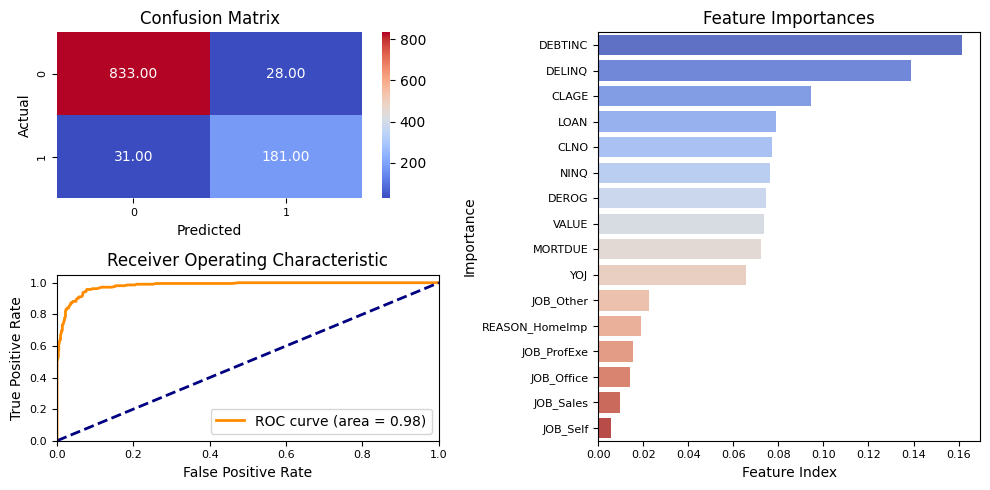

In [125]:
y_pred = rf.predict(X_test_scaled)
#y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else [0] * len(y_pred)

# Score the data
ds = utils.evaluate_classification_metrics('RF - Tuned - OverSampling', y_test, y_pred, X_test_scaled, rf)

## Insights and Recommendations

***Insights***

* The most balanced, overall best performing model in my opinion was the ***Random Forest model created with oversampled training data***. 
* This model had the ***highest F1 score of ~86%***, showing a great balance of precision and recall, and also the highest overall ***accuracy of ~95%***. It correctly ***identifies ~85% of bad loans***.
* This will help to ensure we ***minimize new revenue loss*** from incorrectly identifying default loans, while identifying applicants that will possibly default that will impact ***overall revenue loss***. 
* The variables with the ***most importance*** (in this order) are:
  * DEBTINC
  * DELINQ
  * CLAGE
  * LOAN
  * CLNO
  * NINQ
  * DEROG
  * VALUE
  * MORTDUE
  * YOJ


***Recomendations***

* Missing information should be considered a deal breaker. ***75%*** of the defaulted loans had at least 1 missing value. In order to predict more accurately, data quality has to be a focus area in the future.
  * If missing data is part of normal business process, then I would recommend to create an alternative business process to handle that missing data.
* If the overarching business goal is to use this model to accept or reject real time applications. I would suggest restarting this activity to broaden the use-case to optimize the modelling on ***accuracy***. This could be a use-case that can be put into production for real time predictions.

